# Spotify Music Data - EDA

The dataset consists of about 600 songs that were in the top 100 on Spotify during 2010 - 2019. 

## Load Packages and Data

In [2]:
#load packages
import numpy as np
import pandas as pd

In [8]:
#load data
df = pd.read_csv('top10s.csv', encoding='ISO-8859-1')
df = df.drop(columns = ['Unnamed: 0'])

In [9]:
df.head()

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [13]:
#variables
variables = pd.DataFrame(columns= ['variable name','number of unique values', 'values'])

for i, var in enumerate(df.columns):
    variables.loc[i] = [var, df[var].nunique(), df[var].unique().tolist()]

In [35]:
#dataframe of column explanations
varsexp = pd.read_csv('spotify_vardict.csv', index_col=[0])

In [43]:
pd.set_option('display.max_colwidth', -1)
variables.set_index('variable name').join(varsexp)

,number of unique values,values,explanation
variable name,,,
title,584,"[Hey, Soul Sister, Love The Way You Lie, TiK ToK, Bad Romance, Just the Way You Are, Baby, Dynamite, Secrets, Empire State of Mind (Part II) Broken Down, Only Girl (In The World), Club Can't Handle Me (feat. David Guetta), Marry You, Cooler Than Me - Single Mix, Telephone, Like A G6, OMG (feat. will.i.am), Eenie Meenie, The Time (Dirty Bit), Alejandro, Your Love Is My Drug, Meet Me Halfway, Whataya Want from Me, Take It Off, Misery, All The Right Moves, Animal, Naturally, I Like It, Teenage Dream, California Gurls, 3, My First Kiss - feat. Ke$ha, Blah Blah Blah (feat. 3OH!3), Imma Be, Try Sleeping with a Broken Heart, Sexy Bitch (feat. Akon), Bound To You - Burlesque Original Motion Picture Soundtrack, If I Had You, Rock That Body, Dog Days Are Over, Something's Got A Hold On Me - Burlesque Original Motion Picture Soundtrack, Doesn't Mean Anything, Hard, Loca, You Lost Me, Not Myself Tonight, Written in the Stars (feat. Eric Turner), DJ Got Us Fallin' In Love (feat. Pitbull), Castle Walls (feat. Christina Aguilera), Break Your Heart, Hello, A Thousand Years, Someone Like You, Give Me Everything, Rolling in the Deep, Run the World (Girls), Moves Like Jagger - Studio Recording From The Voice Performance, Love On Top, Grenade, Tonight Tonight, What the Hell, Born This Way, Monster, Best Thing I Never Had, Party Rock Anthem, We R Who We R, Price Tag, Good Life, Just Cant Get Enough, On The Floor, What's My Name?, Yeah 3x, Without You (feat. Usher), Sexy And I Know It, The Edge Of Glory, E.T., Till the World Ends, I Wanna Go, Blow, You And I, Judas, Tonight (I'm Fuckin' You), Please Don't Go, We Found Love, Marry The Night, 1+1, Hold It Against Me, I'm Into You, Papi, Cheers (Drink To That), S&M Remix, Jar of Hearts, Turning Page, Super Bass, Raise Your Glass, Invading My Mind, Moment 4 Life - Album Version (Edited), Last Friday Night (T.G.I.F.), Firework, Muny - Album Version (Edited), ...]",Song's title
artist,184,"[Train, Eminem, Kesha, Lady Gaga, Bruno Mars, Justin Bieber, Taio Cruz, OneRepublic, Alicia Keys, Rihanna, Flo Rida, Mike Posner, Far East Movement, Usher, Sean Kingston, The Black Eyed Peas, Adam Lambert, Maroon 5, Neon Trees, Selena Gomez & The Scene, Enrique Iglesias, Katy Perry, Britney Spears, 3OH!3, David Guetta, Christina Aguilera, Florence + The Machine, Shakira, Tinie Tempah, T.I., Martin Solveig, Christina Perri, Adele, Pitbull, Beyoncé, Hot Chelle Rae, Avril Lavigne, Kanye West, LMFAO, Jessie J, Jennifer Lopez, Chris Brown, Sleeping At Last, Nicki Minaj, P!nk, Coldplay, One Direction, Taylor Swift, Carly Rae Jepsen, Kelly Clarkson, Owl City, The Wanted, fun., Ellie Goulding, Gym Class Heroes, Avicii, The Script, Miley Cyrus, Swedish House Mafia, Daft Punk, James Arthur, Robin Thicke, Demi Lovato, Zedd, Lana Del Rey, Calvin Harris, Drake, Sara Bareilles, Macklemore & Ryan Lewis, Labrinth, Ne-Yo, Ariana Grande, Justin Timberlake, will.i.am, Icona Pop, Fergie, Little Mix, Emeli Sandé, Selena Gomez, Austin Mahone, Jonas Brothers, Mariah Carey, Ciara, Jewel, Kelly Rowland, John Legend, Sam Smith, Pharrell Williams, MAGIC!, Passenger, Bastille, Lorde, John Newman, Disclosure, Michael Jackson, 5 Seconds of Summer, Iggy Azalea, Jason Derulo, The Chainsmokers, Birdy, ...]",Song's artist
top genre,50,"[neo mellow, detroit hip hop, dance pop, pop, canadian pop, hip pop, barbadian pop, atl hip hop, australian pop, indie pop, art pop, colombian pop, big room, british soul, chicago rap, acoustic pop, permanent wave, boy band, baroque pop, celtic rock, electro, complextro, canadian hip hop, candy pop, alaska indie, folk-pop, metropopolis, house, australian hip hop, electropop, australian dance, hollywood, canadian contemporary r&b, irish singer-songwriter, tropical house, belgian edm, french indie pop, hip hop, danish pop, latin, canadian latin, electronic trap, edm, electro house, downtempo, brostep, contemporary country, moroccan pop, escape room, a

## EDA / Graphical EDA

In [37]:
df.shape

(603, 14)

In [38]:
#any missing values?
df.isnull().sum()

title        0
artist       0
top genre    0
year         0
bpm          0
nrgy         0
dnce         0
dB           0
live         0
val          0
dur          0
acous        0
spch         0
pop          0
dtype: int64

In [39]:
#check data types are what I expect them to be
df.dtypes

title        object
artist       object
top genre    object
year          int64
bpm           int64
nrgy          int64
dnce          int64
dB            int64
live          int64
val           int64
dur           int64
acous         int64
spch          int64
pop           int64
dtype: object

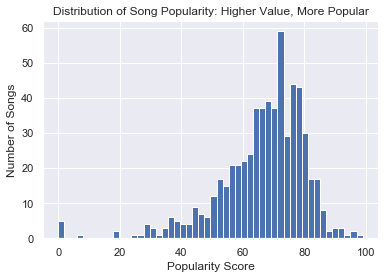

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#distribution of popularity
_=plt.hist(df['pop'], bins = 50)
_=plt.xlabel('Popularity Score')
_=plt.ylabel('Number of Songs')
_=plt.title('Distribution of Song Popularity: Higher Value, More Popular')
plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F66C175588>,
      dtype=object)

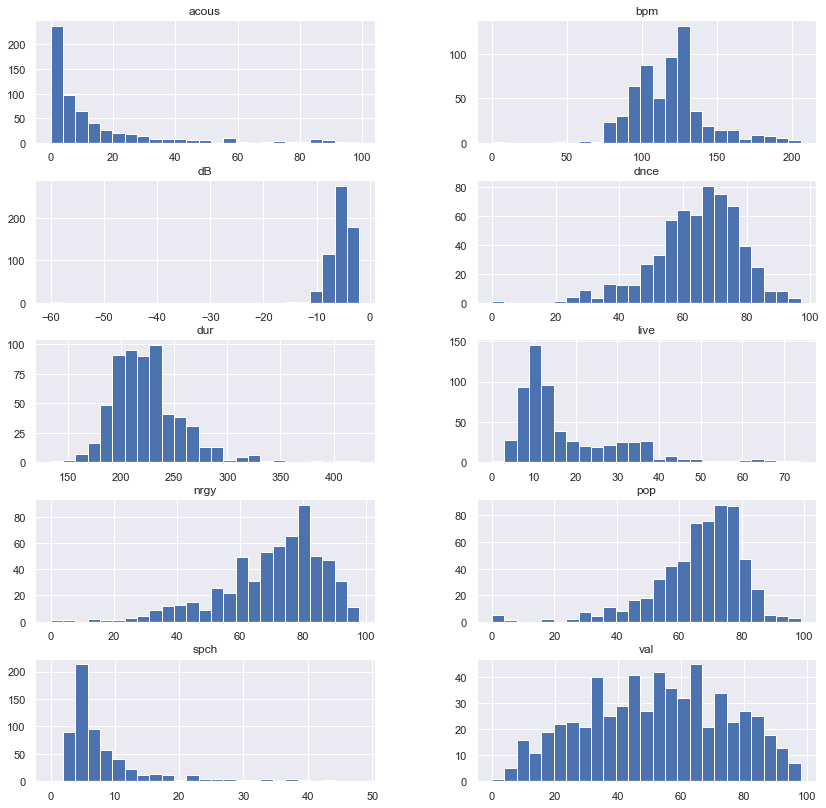

In [41]:
#histograms of numeric cols

from itertools import combinations
#histogram of all numeric data
num_cols = ['bpm','nrgy','dnce','dB','live','val','dur','acous','spch','pop']
numdf = df[num_cols]

fig,axis = plt.subplots(5,2,figsize = (14,14))
numdf.hist(ax = axis, bins = 'sqrt')

With the histograms, we can get a sense of the distribution of the data. For example, a majority of the data rates very low on acoustic and speechiness. The majority of the songs in this data set are NOT acoustic or spoken word. However, the songs are skewed to the right on danceability and energy, so most of the songs in this data set have high danceability and energy ratings.

,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
bpm,1.000000,0.126170,-0.131301,0.183870,0.081579,0.016021,-0.029359,-0.113257,0.058999,0.018983
nrgy,0.126170,1.000000,0.167209,0.537528,0.186738,0.409577,-0.143610,-0.562287,0.107313,-0.057645
dnce,-0.131301,0.167209,1.000000,0.233170,-0.028801,0.501696,-0.176841,-0.240064,-0.028041,0.116054
dB,0.183870,0.537528,0.233170,1.000000,0.081934,0.282922,-0.104723,-0.190401,-0.001110,0.156897
live,0.081579,0.186738,-0.028801,0.081934,1.000000,0.020226,0.098339,-0.098167,0.144103,-0.075749
val,0.016021,0.409577,0.501696,0.282922,0.020226,1.000000,-0.262256,-0.249038,0.122013,0.038953
dur,-0.029359,-0.143610,-0.176841,-0.104723,0.098339,-0.262256,1.000000,0.091802,0.054564,-0.104363
acous,-0.113257,-0.562287,-0.240064,-0.190401,-0.098167,-0.249038,0.091802,1.000000,0.002763,0.026704
spch,0.058999,0.107313,-0.028041,-0.001110,0.144103,0.122013,0.054564,0.002763,1.000000,-0.041490
pop,0.018983,-0.057645,0.116054,0.156897,-0.075749,0.038953,-0.104363,0.026704,-0.041490,1.000000


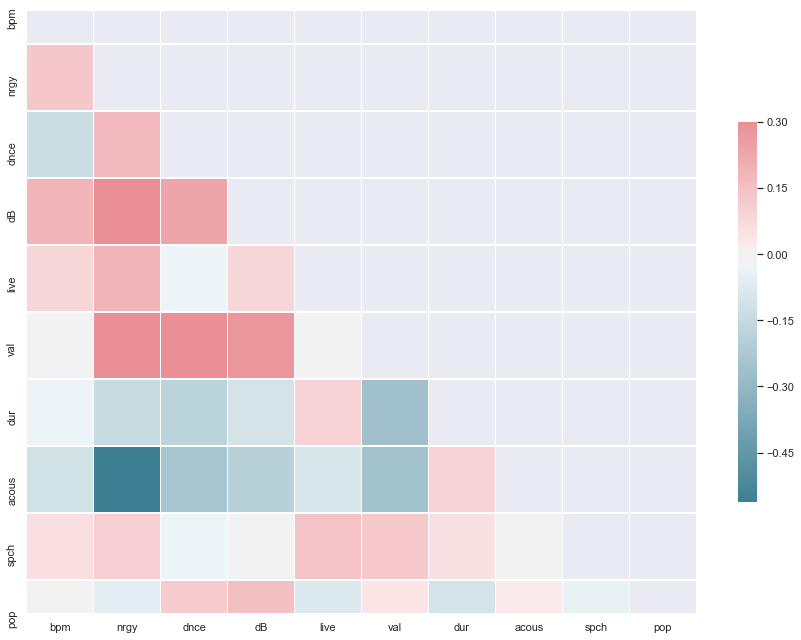

In [53]:
#cprrelation matrix to get an idea of how the variables are correlated to popularity
correlation = numdf.corr()
mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(15, 14))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(correlation, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})
correlation

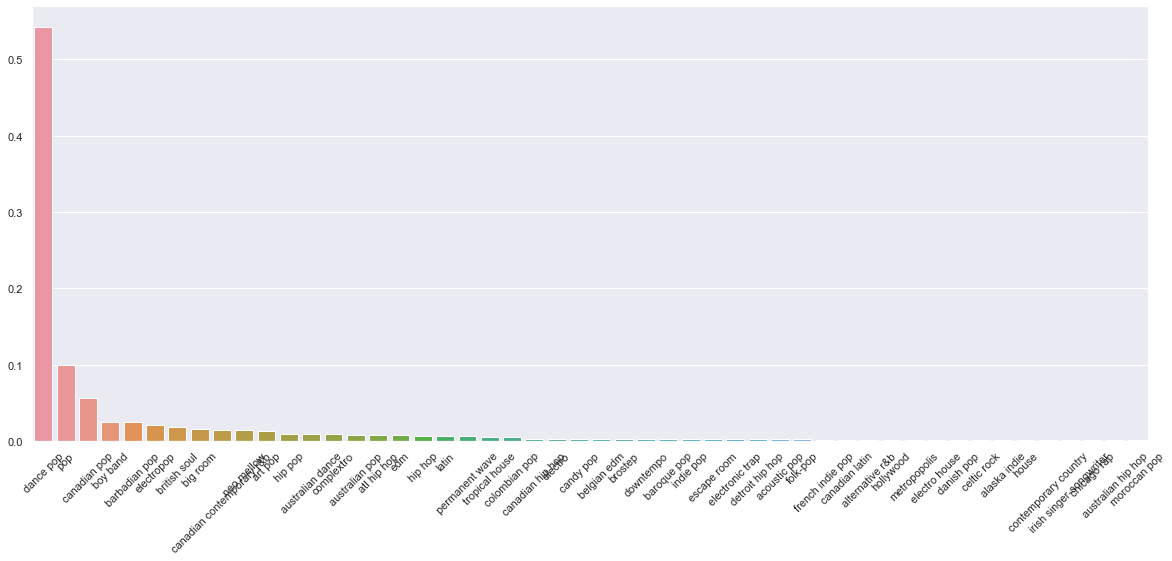

In [132]:
#value counts of genre
sns.set(rc = {'figure.figsize':(20,8)})
genres = df['top genre'].value_counts(normalize = True, ascending = False)
ax = sns.barplot(x = genres.index.values, y = genres.values)
plt.xticks(rotation = 45)
plt.show()

More than half of the songs in this data set come from one genre: dance pop

In [87]:
pd.options.display.max_rows = 700
df['artist'].value_counts()

Katy Perry                  17
Justin Bieber               16
Rihanna                     15
Maroon 5                    15
Lady Gaga                   14
Bruno Mars                  13
Shawn Mendes                11
Pitbull                     11
Ed Sheeran                  11
The Chainsmokers            11
Calvin Harris               10
Adele                       10
Jennifer Lopez              10
Kesha                       9 
Ariana Grande               9 
OneRepublic                 9 
David Guetta                9 
Justin Timberlake           9 
Britney Spears              9 
Demi Lovato                 8 
Taylor Swift                8 
Beyoncé                     8 
Selena Gomez                8 
One Direction               7 
DNCE                        7 
Sia                         6 
Christina Aguilera          6 
Zedd                        6 
Nicki Minaj                 6 
Alicia Keys                 6 
P!nk                        6 
Meghan Trainor              6 
Enrique 

Katy Perry, Justin Bieber, Rihanna, and Maroon 5 have the most songs this data set

## Of the top 15 artists by count of song in the data set, what were their average song popularities?

In [91]:
top15 = df['artist'].value_counts()[0:15]

In [92]:
top15

Katy Perry          17
Justin Bieber       16
Rihanna             15
Maroon 5            15
Lady Gaga           14
Bruno Mars          13
Shawn Mendes        11
Pitbull             11
Ed Sheeran          11
The Chainsmokers    11
Calvin Harris       10
Adele               10
Jennifer Lopez      10
Kesha               9 
Ariana Grande       9 
Name: artist, dtype: int64

In [96]:
averagepop = df.groupby('artist').mean()
averagepop = averagepop[['pop']]
averagepop = averagepop.merge(top15.rename('count of songs in data set'), left_index=True, right_index=True)

In [120]:
averagepop = averagepop.sort_values(by = 'pop', ascending = False)

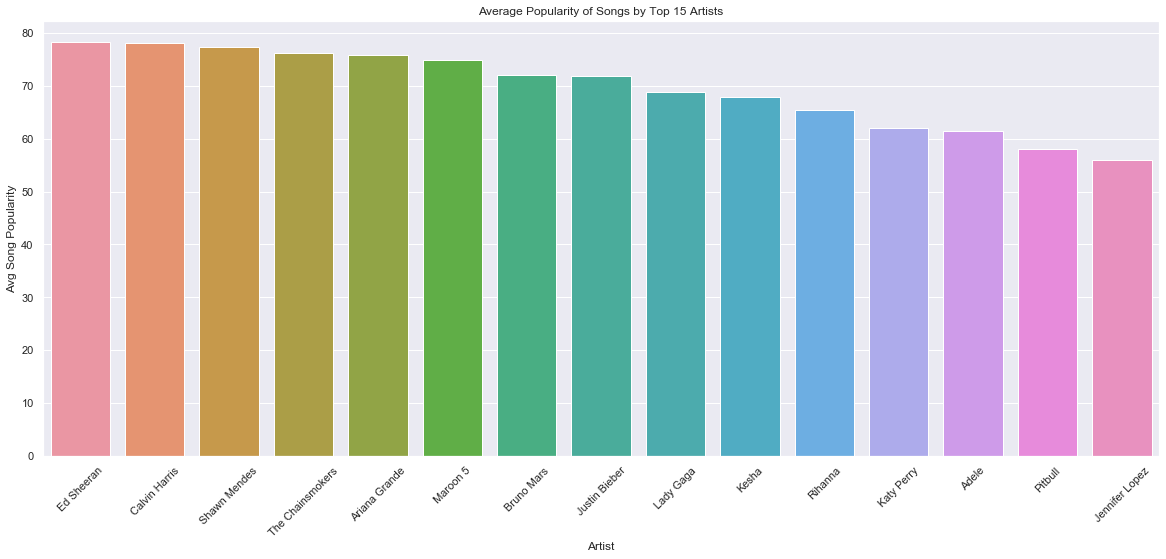

In [131]:
#plot avg popularity by artist
sns.set(rc = {'figure.figsize':(20,8)})
ax = sns.barplot(x = averagepop.index.values, y = 'pop', data = averagepop).set(title='Average Popularity of Songs by Top 15 Artists', xlabel='Artist', ylabel='Avg Song Popularity')
plt.xticks(rotation = 45)
plt.show()

Ed Sheeran, Calvin Harris, and Shawn Mendes have the highest average popularities of the top 15 artists in this data set.